# Que-1
- In answering this exam I have neither taken help from anyone nor helped anyone.  

In [65]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as st
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

# Que-2

## a

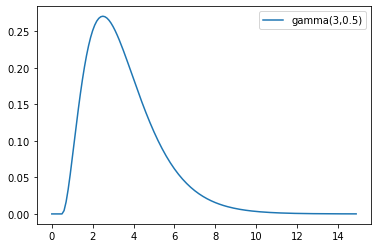

In [34]:
x = np.arange (0, 15, 0.1)

y = st.gamma.pdf(x,3,0.5)
plt.plot(x,y,label='gamma(3,0.5)')
plt.legend()
plt.show()

## b

In [25]:
lik_data=[3, 7, 4, 10, 1]
n=5
sum(lik_data)

25

apply bayes rule to get posterior
$$
P(\lambda|X)=\frac{P(X|\lambda)P(\lambda)}{P(X)}
$$
put values of lik and prior
$$
P(\lambda|X)=\frac{{\prod_{i=1}^{5} \frac{\lambda^{x_i} e^{(-\lambda)}}{x_i!}}\frac{b^a\lambda^{a-1}e^{(-b\lambda)}}{\Gamma(a)}}{P(X)}
$$
we can ignore constants for now as they are conjugate distributions. after solving it we get
$$
P(\lambda|X) \propto \lambda^{a-1+\sum_{i=1}^{5} x_i} e^{-(5+b)\lambda}
$$
by comparing above with beta distributoin we get posterior
$$
P(\lambda|X) \sim \Gamma(\sum_{i=1}^{5} x_i+a,5+b)
$$
solve sums and put values of a and b 
$$
P(\lambda|X) \sim \Gamma(28,5.5)
$$


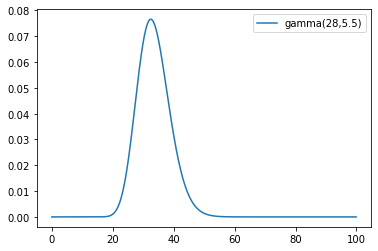

In [80]:
x = np.arange (0, 100, 0.1)

y = st.gamma.pdf(x,28,5.5)
plt.plot(x,y,label='gamma(28,5.5)')
plt.legend()
plt.show()

## c

In [105]:
# generate samples using pymc
with pm.Model() as model:
    th = pm.Gamma('th', 28.0, 5.5)
    x = pm.Poisson('x', th)
    samples=pm.sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [th]
>Metropolis: [x]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [78]:
sample_values=samples.get_values('x')[:5000]

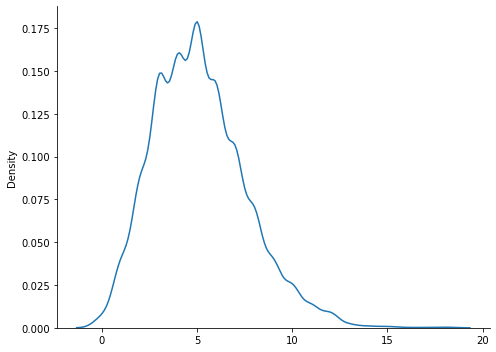

In [88]:
sns.displot(
  data=sample_values,
  kind="kde",
  aspect=1.4,
)
plt.show()

In [82]:
az.summary(samples)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,5.091,2.451,0.000,9.00,0.042,0.031,3447.0,4062.0,1.0
th,5.102,0.962,3.328,6.87,0.012,0.009,6114.0,10064.0,1.0


## d

In [90]:
min_data=min(lik_data)
max_data=max(lik_data)


In [91]:
min_data

1

In [92]:
max_data

10

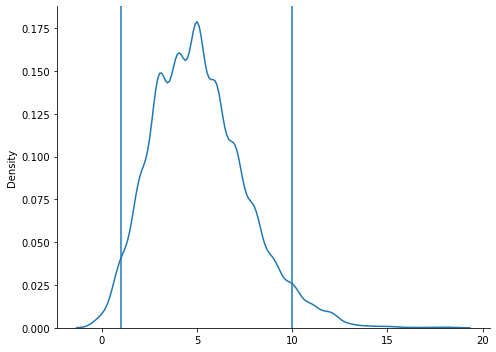

In [89]:
sns.displot(
  data=sample_values,
  kind="kde",
  aspect=1.4,
)
plt.axvline(min(lik_data))
plt.axvline(max(lik_data))
plt.show()

In [106]:
az.summary(samples)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,5.038,2.416,1.000,9.000,0.041,0.029,3587.0,4644.0,1.0
th,5.094,0.957,3.361,6.922,0.013,0.009,5605.0,10204.0,1.0


both prior and posterior predictive samples gives almost same distribution plot, so we can say that indeed model fits the data. also most of the distribution lies between min and max values of observed data values.

## e

one can use classical test to check model fitting. one specific method that we can use is to check Posterior Predictive p-values, and decide significance of the model. 

I estimate the p-value by calculating the fraction of predicted values that are more extreme for the test statistic than the observed value for that statistic. it simply means that how many values are greater than the max of observed data values.

In [101]:
pp_max=sum(sample_values[sample_values>=max_data])/len(sample_values)

In [104]:
pp_max

0.5628

note that the p-value is more than 0.5, that is better than pure chance. we say that the model does fit the data, reasonably well

In [100]:
pp_min=sum(sample_values[sample_values<=min_data])/len(sample_values)

In [103]:
pp_min

0.0382

# Que-3

## a

apply bayes rule to get posterior
$$
P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}
$$
put values of lik and prior
$$
P(\theta|X)=\frac{\prod_{i=1}^{20} \binom {10}{x_i} \theta^{x_i} (1-\theta)^{10-x_i}\frac{\theta^{(a-1)}}{B(a,1)}}{P(X)}
$$
we can ignore constants for now as they are conjugate distributions. after solving it we get
$$
P(\theta|X) \propto \theta^{a-1+\sum_{i=1}^{20} x_i} (1-\theta)^{200-\sum_{i=1}^{20} x_i}
$$
by comparing above with beta distributoin we get posterior
$$
P(\theta|X) \sim beta(\sum_{i=1}^{20} x_i+a,201-\sum_{i=1}^{20} x_i)
$$
solve sums and we get
$$
P(\theta|X) \sim beta(98+a,103)
$$


## b

In [2]:
data=[2, 7, 4, 5, 4, 5, 6, 4, 4, 4, 5, 6, 5, 7, 6, 2, 4, 6, 6, 6]
data_sum=sum(data)
print(data_sum)

98


In [12]:
a_values=list(range(99,109))
b_values=[103]*10

In [13]:
a_values


[99, 100, 101, 102, 103, 104, 105, 106, 107, 108]

In [14]:
b_values

[103, 103, 103, 103, 103, 103, 103, 103, 103, 103]

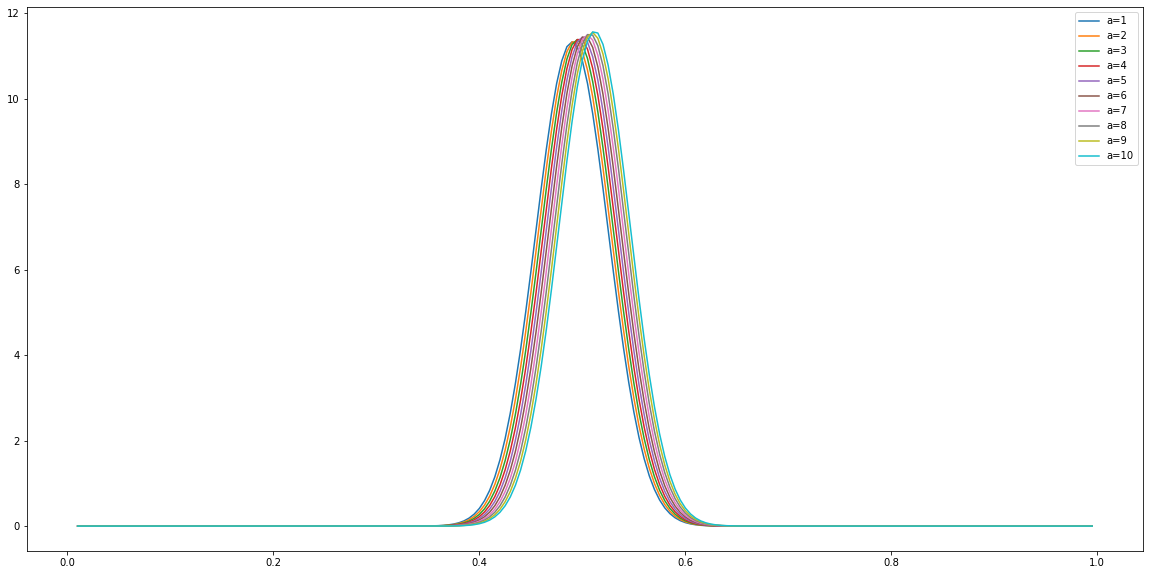

In [19]:
x = np.arange (0.01, 1, 0.005)
fig=plt.figure(figsize=(20,10))
for i in range(10):
    y = st.beta.pdf(x,a_values[i],b_values[i])
    plt.plot(x,y,label='a='+str(i+1))

plt.legend()
plt.show()

## c

calculating bayes factor for a=1 and a=10
$$
BF=\frac{p(data|a=1)}{p(data|a=10)}
$$
basically we have to find the marginal likelihood ratios for specific models and then devide them. using simple bayes rule we get that for this case it is simply the ratio of Beta functions of posterior and prior. So
$$
p(data|a=1)=\frac{B(98+1,103)}{B(1,1)}
$$
$$
p(data|a=10)=\frac{B(98+10,103)}{B(10,1)}
$$
after solving we get 
$$
BF \approx 45
$$

**comment on BF:**
devide and solve them we get number that is way more than 3(rule of thumb value), so we simple choose model with a=1 value as our preferred model.